In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import mrcfile
# import torch
import os

from tomoSegmentPipeline.utils.common import read_array, write_array
from tomoSegmentPipeline.utils import setup
# from cryoS2Sdrop.dataloader import singleCET_dataset, singleCET_FourierDataset

import tomopy.sim.project as proj
from tomopy.recon.algorithm import recon
import matplotlib.pyplot as plt

PARENT_PATH = setup.PARENT_PATH

%matplotlib inline
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 80

def standardize(X):
    mean = X.mean()
    std = X.std()
    new_X = (X - mean) / std

    return new_X

def clip(X, low=0.005, high=0.995):
    # works with tensors =)
    return np.clip(X, np.quantile(X, low), np.quantile(X, high))

In [2]:
cet_path = os.path.join(PARENT_PATH, 'data/S2SDenoising/dummy_tomograms/tomo02_dummy.mrc')
tomo_data = read_array(cet_path)
tomo_data = standardize(clip(tomo_data))
tomo_shape = np.array(tomo_data.shape)
tomo_shape

array([232, 464, 464])

In [9]:
angles0 = np.linspace(0,2*np.pi,100)
projection0 = proj.project(tomo_data, angles0)

angles1 = np.linspace(0.03,2*np.pi+0.03,50)
projection1 = proj.project(tomo_data, angles1)

projection0.shape

(100, 232, 660)

In [10]:
reconstruction0 = recon(projection0, angles0, algorithm='fbp')
reconstruction1 = recon(projection1, angles1, algorithm='fbp')

_shape = np.array(reconstruction0.shape)
s0 = (_shape-tomo_shape)//2
s1 = _shape-s0

reconstruction0 = reconstruction0[s0[0]:s1[0], s0[1]:s1[1], s0[2]:s1[2]]
reconstruction1 = reconstruction1[s0[0]:s1[0], s0[1]:s1[1], s0[2]:s1[2]]

reconstruction0.shape

(232, 464, 464)

(array([9.2000000e+01, 1.1740000e+03, 1.2891000e+04, 8.0367200e+05,
        1.2671675e+07, 2.7670857e+07, 8.3980220e+06, 3.8573600e+05,
        4.4550000e+03, 9.8000000e+01]),
 array([-1098.6418  ,  -895.0558  ,  -691.46967 ,  -487.88358 ,
         -284.2975  ,   -80.711395,   122.874695,   326.4608  ,
          530.0469  ,   733.63293 ,   937.21906 ], dtype=float32),
 <BarContainer object of 10 artists>)

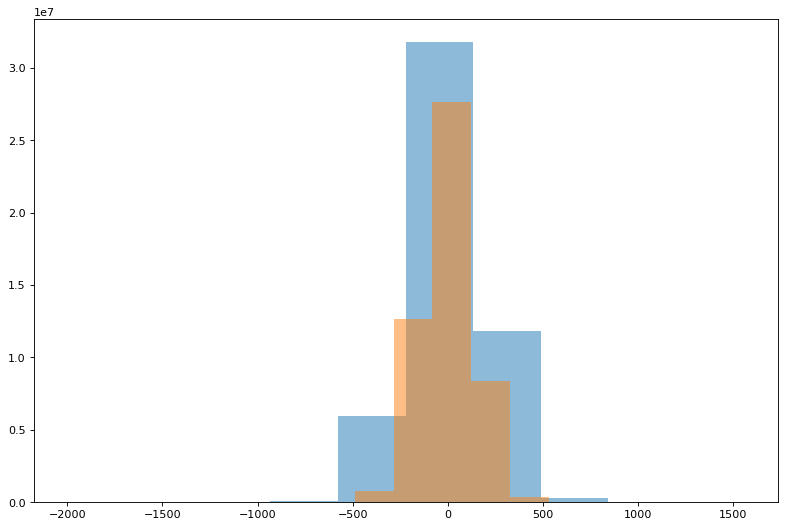

In [11]:
plt.hist(reconstruction0.flatten(), alpha=0.5)
plt.hist(reconstruction1.flatten(), alpha=0.5)

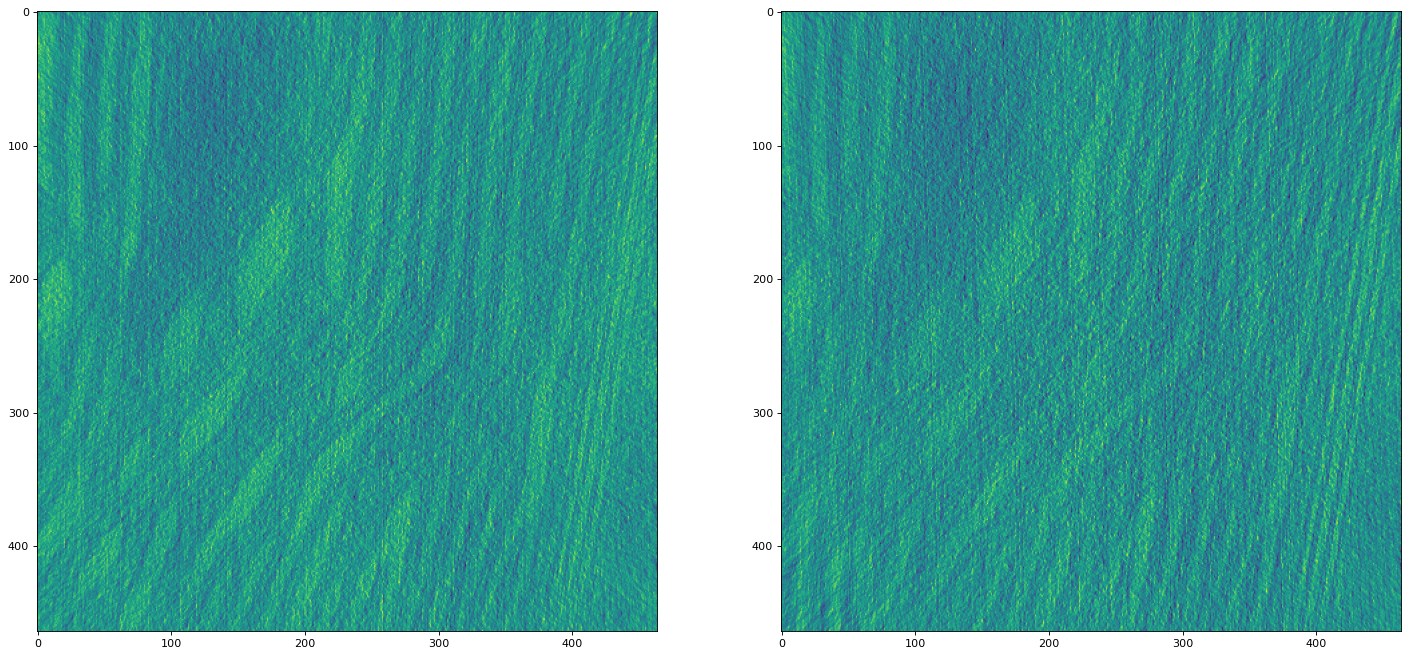

In [12]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(22, 12))

ax0.imshow(reconstruction0[tomo_shape[0]//2])
ax1.imshow(reconstruction1[tomo_shape[0]//2])

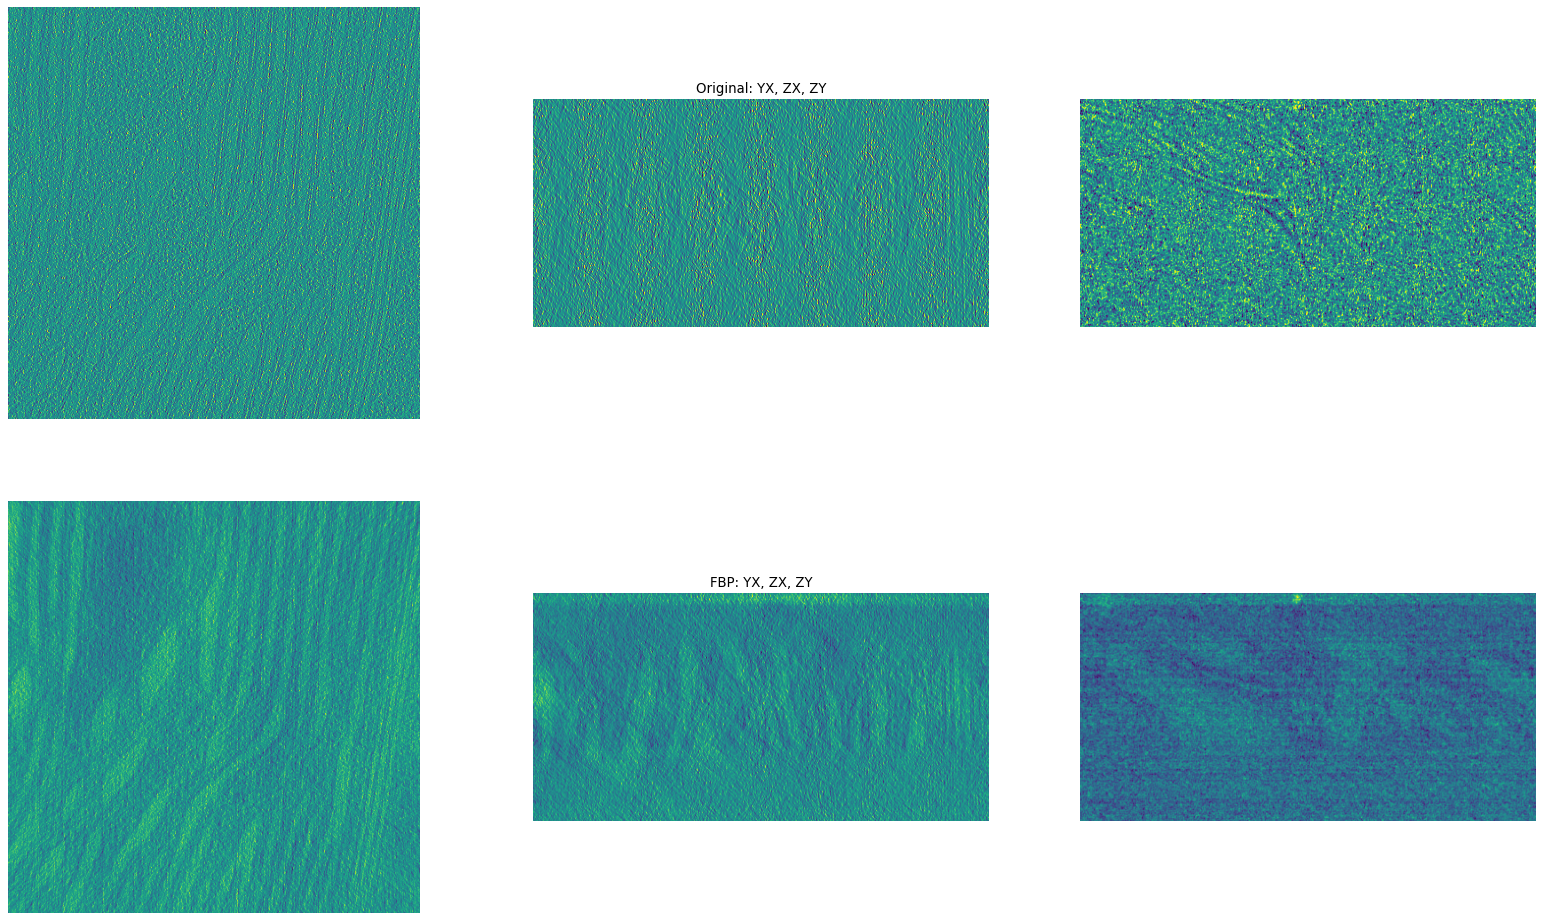

In [7]:
fig, (ax0, ax1) = plt.subplots(2, 3, figsize=(25, 15))
list(map(lambda axi: axi.set_axis_off(), np.array([ax0, ax1]).ravel()))
zidx, yidx, xidx = tomo_shape//2

ax0[1].set_title("Original: YX, ZX, ZY")
ax0[0].imshow(tomo_data[zidx])
ax0[1].imshow(tomo_data[:, yidx, :])
ax0[2].imshow(tomo_data[:, :, xidx])

ax1[1].set_title("FBP: YX, ZX, ZY")
ax1[0].imshow(reconstruction0[zidx])
ax1[1].imshow(reconstruction0[:, yidx, :])
ax1[2].imshow(reconstruction0[:, :, xidx])

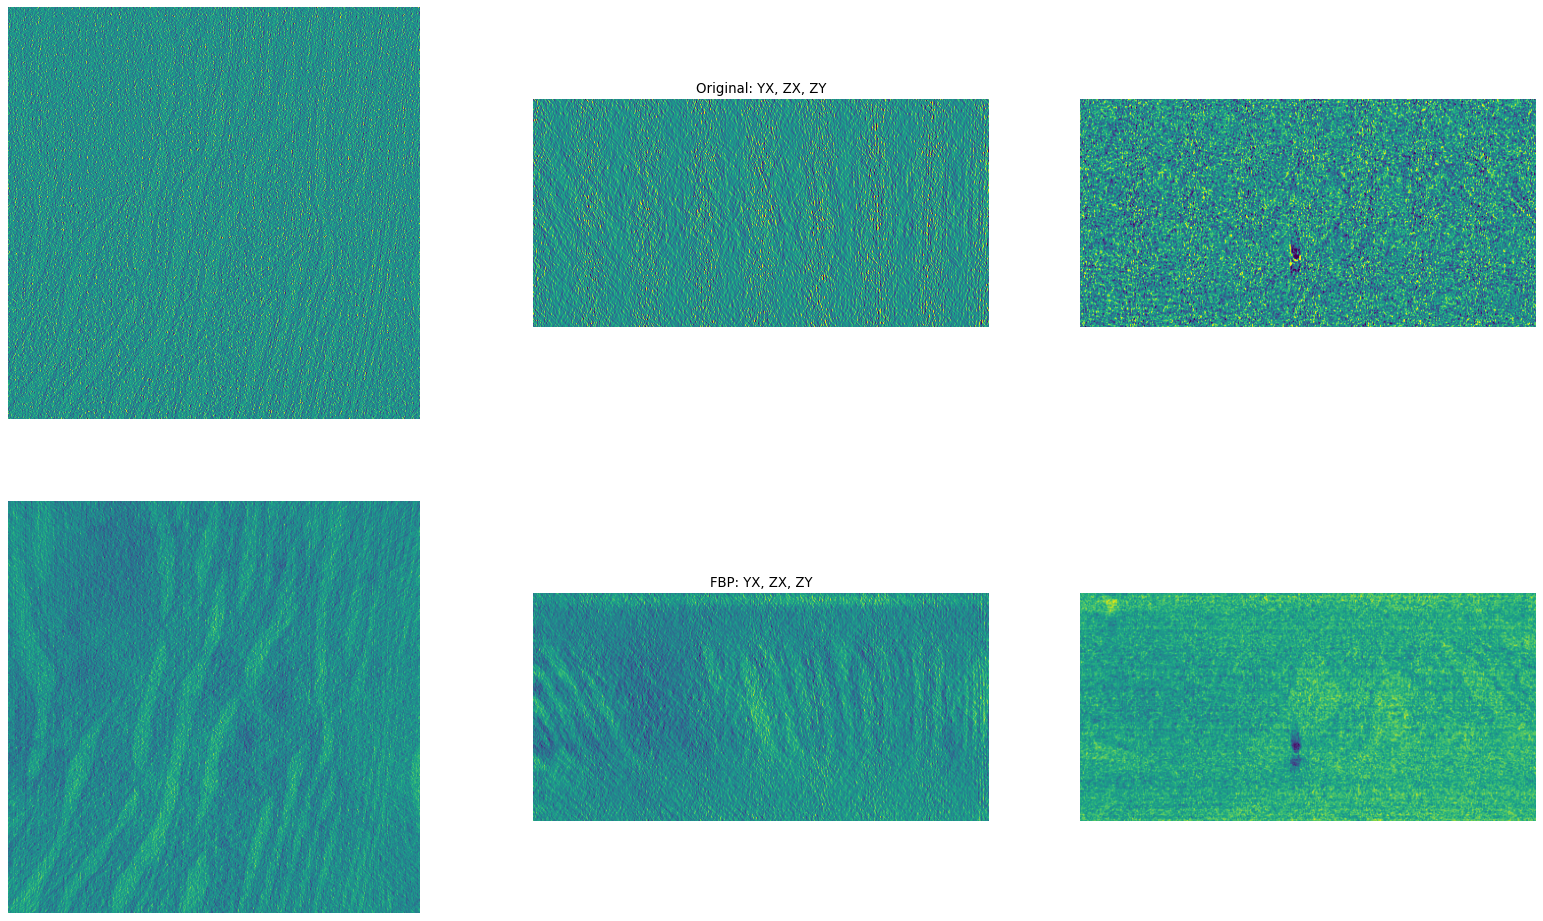

In [8]:
fig, (ax0, ax1) = plt.subplots(2, 3, figsize=(25, 15))
list(map(lambda axi: axi.set_axis_off(), np.array([ax0, ax1]).ravel()))
zidx, yidx, xidx = tomo_shape//4

ax0[1].set_title("Original: YX, ZX, ZY")
ax0[0].imshow(tomo_data[zidx])
ax0[1].imshow(tomo_data[:, yidx, :])
ax0[2].imshow(tomo_data[:, :, xidx])

ax1[1].set_title("FBP: YX, ZX, ZY")
ax1[0].imshow(reconstruction0[zidx])
ax1[1].imshow(reconstruction0[:, yidx, :])
ax1[2].imshow(reconstruction0[:, :, xidx])